In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import scipy.stats as st
import itertools
import math
from collections import Counter, defaultdict
%load_ext autoreload
%autoreload 2

In [4]:
import matplotlib.pylab as plt
import matplotlib as mpl
plt.rcParams['figure.figsize'] = (12.0, 6.0)
#%matplotlib notebook
%matplotlib inline
%load_ext base16_mplrc
%base16_mplrc light default

The base16_mplrc extension is already loaded. To reload it, use:
  %reload_ext base16_mplrc
Setting plotting theme to default-light. Palette available in b16_colors


In [5]:
import cPickle as pickle
from fuzzywuzzy import fuzz, process
from fenaroli_parser.recipe_weights import compute_all_weights, match_ingredients, compute_single_avg_weight

In [6]:
from itertools import permutations, combinations
from fenaroli_parser.recipe_weights import compute_single_avg_weight, match_ingredients

## comparing recipe weights to null model

In [7]:
with open('./data/recipes.pkl', 'r') as f:
    recipe_raw = pickle.load(f)

In [8]:
recipe_comb = {}
for f in recipe_raw:
    recipe_comb.update(f)

In [9]:
with open('./comb_recipes.pkl', 'r') as f:
    recipe_comb = pickle.load(f)

In [10]:
with open('./data/second_ing_flav_dict.pkl', 'r') as f:
    comp_ing_dict = pickle.load(f)

In [11]:
fen_set = set(comp_ing_dict.keys())
cocktail_set = set([i.strip().lower() for sublist in cocktail_ing_lists for i in sublist if i])

NameError: name 'cocktail_ing_lists' is not defined

In [12]:
with open('./backbone_edges_dict.pkl') as f:
    edge_dict = pickle.load(f)

In [13]:
with open('./full_edges_dict.pkl') as f:
    full_edge_dict = pickle.load(f)

In [14]:
def get_range(dictionary, begin, end):
  return dict(itertools.islice(dictionary.iteritems(), begin, end+1)) 

In [75]:
with open('./avg_recipe_weights.pkl', 'r') as f:
    avg_w = pickle.load(f)
with open('./new_avg_recipe_weights.pkl', 'r') as f:
    new_avg_w = pickle.load(f)

In [16]:
with open('./random_weights_new.pkl', 'r') as f:
    random_weights = pickle.load(f)

In [105]:
with open('./new_avg_recipe_weights.pkl', 'r') as f:
    avg_recipe = pickle.load(f)
    
with open('./new_avg_random_weights.pkl', 'r') as f:
    avg_random = pickle.load(f)

In [17]:
len(avg_w)

1213

In [11]:
sorted(avg_w.values(), reverse=True)

[59.0,
 38.0,
 34.0,
 25.5,
 21.6,
 21.333333333333332,
 19.666666666666664,
 17.7,
 17.333333333333332,
 17.2,
 17.0,
 15.5,
 14.700000000000001,
 14.3,
 13.333333333333332,
 13.166666666666666,
 12.733333333333333,
 12.0,
 11.666666666666666,
 11.5,
 10.9,
 10.833333333333332,
 10.0,
 10.0,
 9.666666666666666,
 9.0,
 8.8,
 8.733333333333333,
 8.666666666666666,
 8.6,
 8.5,
 8.4,
 8.333333333333332,
 8.333333333333332,
 8.0,
 7.952380952380952,
 7.933333333333334,
 7.933333333333334,
 7.9,
 7.678571428571428,
 7.533333333333333,
 7.428571428571428,
 7.4,
 7.3809523809523805,
 7.300000000000001,
 7.133333333333333,
 7.1000000000000005,
 7.0,
 7.0,
 6.733333333333333,
 6.7142857142857135,
 6.666666666666666,
 6.666666666666666,
 6.5,
 6.4,
 6.333333333333333,
 6.333333333333333,
 6.333333333333333,
 6.333333333333333,
 6.166666666666666,
 6.142857142857142,
 6.111111111111111,
 6.095238095238095,
 5.9,
 5.800000000000001,
 5.8,
 5.75,
 5.7,
 5.666666666666667,
 5.666666666666666,
 5.666

In [12]:
len(avg_w)

1213

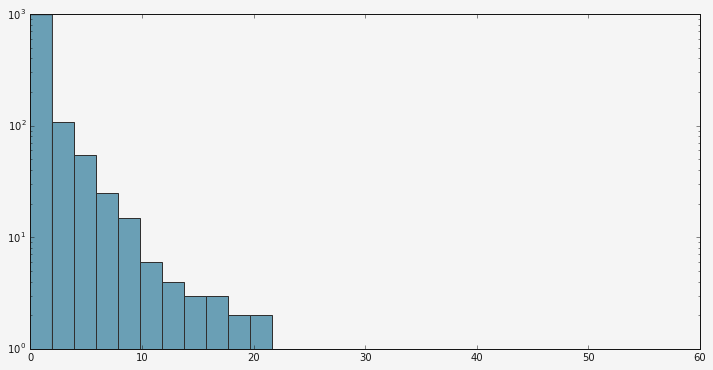

In [220]:
_ = plt.hist(avg_w.values(), bins = 30, log=True)

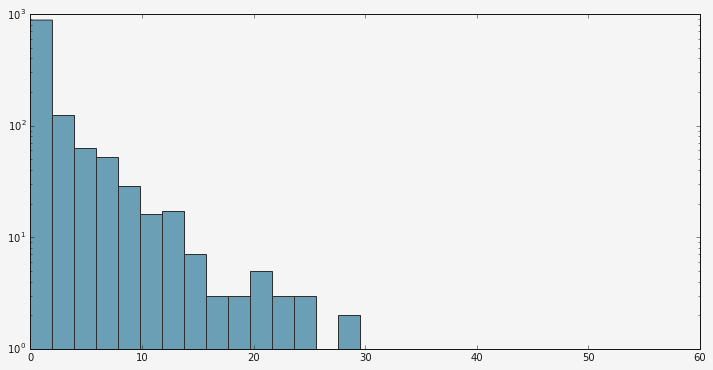

In [76]:
_ = plt.hist(new_avg_w.values(), bins = 30, log=True)

In [18]:
w_arrray = np.array(avg_w.values())
np.mean(w_arrray)

1.4120888796583475

In [23]:
cocktail_ing_lists = recipe_comb.values()
cocktail_set = set([i.strip().lower() for sublist in cocktail_ing_lists for i in sublist if i])

In [24]:
all_pairwise_comb = permutations(cocktail_set, 2)

In [25]:
len(recipe_comb)

1213

In [26]:
pairwise_combos = list(all_pairwise_comb)

In [29]:
pairwise_dict = {combo[0]+ ', ' +combo[1] : list(combo) for combo in pairwise_combos}

In [27]:
with open('./random_pairs.pkl', 'w') as f:
    pickle.dump(pairwise_dict, f)

NameError: name 'pairwise_dict' is not defined

In [89]:
unique_ing_list = list(set([i for sublist in recipe_comb.values()[:10] for i in sublist if i]))

In [99]:
match_dict  = {k:match_ingredients([k], comp_ing_dict) for k in unique_ing_list}

In [100]:
%prun {k:match_ingredients([k], comp_ing_dict) for k in unique_ing_list}

In [ ]:
match_ingredients(['coffee'], comp_ing_dict)

In [61]:
match_dict.keys()

[u'pistachio-infused oloroso sherry*',
 u'gin,',
 u'beet juice',
 u'peach bitters',
 u'amaro montenegro',
 u'green spot irish whiskey',
 u'dried cherry',
 u'ice',
 u'maple syrup',
 u'orange sherbet',
 u'guava',
 u'liqueurs',
 u'milk',
 u'pumpkin butter',
 u'vanilla bean',
 u'orange-ginger marmalade',
 u'blueberries',
 u'grape',
 u'giffard vanilla syrup orgeat',
 u'fig syrup',
 u"b.g reynolds don's spices #2",
 u'sparkling cider',
 u'triple sec',
 u'cayenne pepper',
 u'clamato',
 u'fresh curry leaves',
 u'pineapple core',
 u'blue cura\xe7ao',
 u'melon',
 u'punt e mes',
 u'blanched almonds',
 u'raspberry simple syrup',
 u'purely syrup grapefruit',
 u'cr\xe8me de cassis',
 u'canadian whisky',
 u'maldon salt',
 u'ginger ale',
 u'tamarind syrup',
 u'cranberry sauce',
 u'barbecue bitters',
 u'green tea',
 u'boiling water',
 u'sparkling wine',
 u'chocolate liqueur',
 u'strawberry puree',
 u'tangerine juice',
 u'scotch whisky',
 u'absinthe',
 u'asparagus',
 u'star fruit',
 u'a\xe7a\xed sugar',

In [63]:
compute_single_avg_weight(('beer', 'red wine'), comp_ing_dict, edge_dict, match_dict)

46.0

In [52]:
edge_dict['bacon, chocolate']

0

In [256]:
def get_range(dictionary, begin, end):
    return dict(itertools.islice(dictionary.iteritems(), begin, end+1))

In [72]:
len(pairwise_dict)/100

8751.6

In [103]:
%prun pdd = compute_all_weights(reciptope_comb, comp_ing_dict, edge_dict)

[u'Pok Pok Pineapple Drinking Vinegar', u'dr. adam elmegirab dandelion and burdock bitters', u'Worcestershire sauce', u'St-Germain', u'beet juice', u'peach bitters', u'strawberry puree', u'Thai basil', u'dried cherry', u'ice', u'Gin', u'guava', u'zginger liqueur', u'milk', u'pumpkin butter', u'vanilla bean', u'orange-ginger marmalade', u'blueberries', u'grape', u'pineapple juice', u'fig syrup', u'sparkling cider', u'blackberries', u'Aveze Gentian Liqueur', u'triple sec', u'cayenne pepper', u'Demarara Syrup', u'Fresh pineapple juice', u'pineapple core', u'melon', u'blanched almonds', u'raspberry simple syrup', u'Meyer lemon', u'pear fan', u'cr\xe8me de cassis', u'armagnac', u'Canadian', u'maldon salt', u'ginger ale', u'tamarind syrup', u'cranberry sauce', u'barbecue bitters', u'boiling water', u'sparkling wine', u'chocolate liqueur', u'Marie Brizard Apry', u'tangerine juice', u'lemon sherbet', u'asparagus', u'cherry vodka', u'a\xe7a\xed sugar', u'dry rub spice mixture', u'averna', u'van

In [254]:
comp_ing_dict

defaultdict(list,
            {'macadamia nuts': ['ISOBUTYRALDEHYDE',
              'ISOPHORONE',
              'HEPTYL ALCOHOL'],
             'mackerel': ['DISODIUM 5\xca\xb9-INOSINATE'],
             'yellow': ['PHENETHYL BUTYRATE',
              'cis-3-HEXEN-1-YL ACETATE',
              'ISOAMYL BUTYRATE'],
             'naranjilla fruit (solanum quitense lam )': ['BUTAN-3-ONE-2-YL BUTANOATE'],
             'asian': ['CINNAMIC ACID'],
             'grapefruit peel oil': ['p-MENTHAN-2-OL',
              'UNDECYL ALCOHOL',
              '4\xca\xb9-METHYLACETOPHENONE',
              '\xce\xb2-PINENE'],
             'mandarin) to as low as 1% (palmarosa)': ['LIMONENE (d-, l-, and dl-)'],
             'black chokeberry': ['cis-3-HEXENYL FORMATE',
              'DIHYDRO-\xce\xb2-IONONE'],
             'the product obtained from natural sources is probably levorotatory': ['p-\xce\xb1-DIMETHYLBENZYL ALCOHOL'],
             'hyssop': ['4-(2,6,6-TRIMETHYL-CYCLOHEXA-1,3-DIENYL)BUT-2-EN-4-ONE'

In [222]:
len(pairwise_dict.keys())

875160

In [203]:
pairwise_combos[3]

(u'pistachio-infused oloroso sherry*', u'amaro montenegro')

In [201]:
match_ingredients(pairwise_combos[3], comp_ing_dict)

[u'used', u'cherry', u'aroma', u'berry', u'sherry', u'pistachio nut']

In [181]:
r1 = ('coffee', 'beef')

compute_single_avg_weight(r1, comp_ing_dict, full_edge_dict)

len(comp_ing_dict['beef'])

full_edge_dict['beef, coffee']

len(set(comp_ing_dict['shrimp']).intersection(set(comp_ing_dict['lemon'])))

(set(comp_ing_dict['coffee']).intersection(set(comp_ing_dict['grilled beef'])))

# comp_ing_dict['shrimp (cooked)']

# match_ingredients(['beef'], comp_ing_dict)

# match_ingredients(['lemon'], comp_ing_dict)

# comp_ing_dict['shrimp']

# comp_ing_dict['tea (black)']

# comp_ing_dict['fried beef']

# comp_ing_dict['lemon']

In [218]:
sorted(avg_w.values(), reverse=True)[:25]

[59.0,
 38.0,
 34.0,
 25.5,
 21.6,
 21.333333333333332,
 19.666666666666664,
 17.7,
 17.333333333333332,
 17.2,
 17.0,
 15.5,
 14.700000000000001,
 14.3,
 13.333333333333332,
 13.166666666666666,
 12.733333333333333,
 12.0,
 11.666666666666666,
 11.5,
 10.9,
 10.833333333333332,
 10.0,
 10.0,
 9.666666666666666]

In [219]:
sorted(avg_full_w.values(), reverse=True)[:25]

[62.0,
 42.666666666666664,
 38.0,
 30.666666666666664,
 24.666666666666664,
 23.6,
 23.333333333333332,
 21.333333333333332,
 20.0,
 19.6,
 19.3,
 18.7,
 16.833333333333332,
 16.1,
 15.833333333333332,
 15.8,
 15.0,
 15.0,
 14.5,
 14.0,
 13.5,
 13.200000000000001,
 11.333333333333332,
 11.2,
 11.0]

In [260]:
random_weights

defaultdict(float,
            {u'amaro montenegro, tomato': 4.0,
             u'beer,, coconut water with tangerine': 5.0,
             u'grenadine, evaporated milk': 0.0,
             u'half and half, mango syrup': 0.0,
             u'honey, chardonnay': 0.0,
             u'orange twist, sugar syrup': 0.0,
             u'scaldis p\xe3\xaache mel beer, cocoa powder': 11.0,
             u'st-germain, orange juice': 0.0,
             u'star anise, edible pansy': 0.0,
             u'tamarind, vanilla cognac': 20.0,
             u'white rumskey, citrus vodka': 0.0})

In [110]:
sorted(avg_recipe.values(), reverse = True)[:20]

sorted(avg_random.values(), reverse = True)[:20]

[59.0,
 32.666666666666664,
 30.8,
 29.0,
 28.0,
 26.333333333333332,
 25.0,
 24.833333333333332,
 24.666666666666664,
 23.2,
 22.333333333333332,
 22.0,
 21.333333333333332,
 21.0,
 20.666666666666664,
 20.0,
 19.8,
 18.666666666666664,
 18.333333333333332,
 17.8]

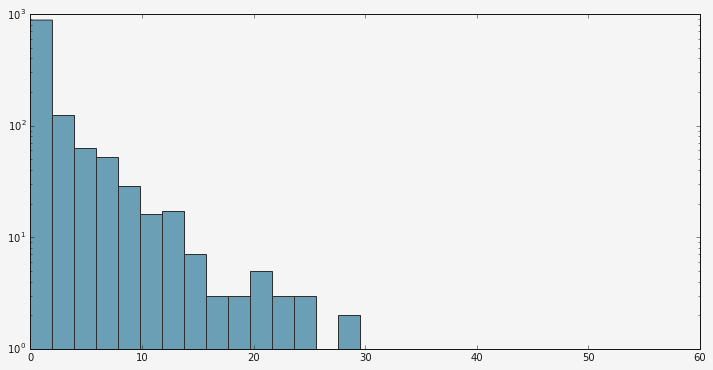

In [119]:
_ = plt.hist(avg_recipe.values(), bins = 30, log=True)

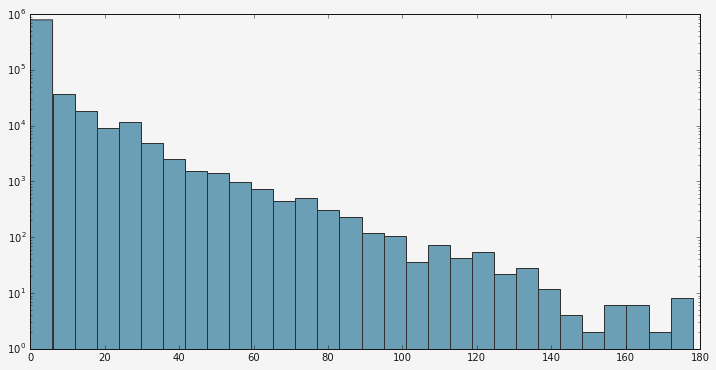

In [120]:
_ = plt.hist(avg_random.values(), bins = 30, log=True)

In [125]:
avg_random.keys()[:5]

[u'half and half, mango syrup',
 u'star anise, edible pansy',
 u'grenadine, evaporated milk',
 0,
 u'tamarind, vanilla cognac']